<a href="https://colab.research.google.com/github/Navdeep21582009/Databases-and-Analytics-CS-10-FEB-25---06-JUN-25-CP6CS56E_A_SEM2_202425/blob/main/Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary packages
install.packages("dplyr", quiet = TRUE)
install.packages("ggplot2", quiet = TRUE)
install.packages("sqldf", quiet = TRUE)
install.packages("lubridate", quiet = TRUE) # For date manipulation
install.packages("knitr", quiet = TRUE) # For kable (nice tables)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’




In [ ]:
# Load the libraries
library(dplyr)
library(ggplot2)
library(sqldf)
library(lubridate)
library(readr) # For read_csv, generally better than base read.csv
library(knitr) # For kable


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
greenfuture_df <- read.csv("https://raw.githubusercontent.com/Navdeep21582009/Databases-and-Analytics-CS-10-FEB-25---06-JUN-25-CP6CS56E_A_SEM2_202425/refs/heads/main/greenfuture_ideas_dataset.csv")

In [ ]:
# Display the first few rows and structure of the dataframe
cat("First 6 rows of the dataset:\n")
print(head(greenfuture_df))
cat("\nStructure of the dataset:\n")
str(greenfuture_df)
cat("\nSummary of the dataset:\n")
summary(greenfuture_df)

First 6 rows of the dataset:
  Employee.ID Office.Location           Department Idea.Submission.Date
1    587b45d8         Germany     Renewable Energy           16/04/2024
2    0d3e8b8e          Canada     Renewable Energy           14/01/2024
3    fa012fe7          France Environmental Policy           10/01/2025
4    cb8ed680           Japan           Technology           24/12/2023
5    333fff26       Australia           Technology           13/02/2025
6    a34ebb0f           India           Technology           08/09/2024
  Idea.Title         Idea.Category Number.of.Votes Collaboration.Status
1     Idea 1 Sustainable Transport             231   Single Contributor
2     Idea 2      Water Management             477  Cross-Regional Team
3     Idea 3      Renewable Energy              48  Cross-Regional Team
4     Idea 4      Circular Economy             330  Cross-Regional Team
5     Idea 5      Circular Economy             428   Single Contributor
6     Idea 6      Circular Economy 

 Employee.ID        Office.Location     Department        Idea.Submission.Date
 Length:3000        Length:3000        Length:3000        Length:3000         
 Class :character   Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character   Mode  :character    
                                                                              
                                                                              
                                                                              
  Idea.Title        Idea.Category      Number.of.Votes Collaboration.Status
 Length:3000        Length:3000        Min.   :  0.0   Length:3000         
 Class :character   Class :character   1st Qu.:123.8   Class :character    
 Mode  :character   Mode  :character   Median :247.0   Mode  :character    
                                       Mean   :248.3                       
                                       3rd Qu.:374.0               

Number of NAs in Idea.Submission.Date after dmy conversion:  0 


--- SQLDF: EXECUTING SQL QUERIES ---

Query 1 (sqldf): Ideas from Germany with > 200 votes


|Idea.Title |Department           | Number.of.Votes|
|:----------|:--------------------|---------------:|
|Idea 2742  |Technology           |             492|
|Idea 1298  |Renewable Energy     |             487|
|Idea 518   |Urban Development    |             483|
|Idea 58    |Infrastructure       |             482|
|Idea 1370  |Environmental Policy |             482|

Query 2 (sqldf): Count and average votes per Idea.Category


|Idea.Category         | NumberOfIdeas| AverageVotes|
|:---------------------|-------------:|------------:|
|Water Management      |           492|     255.6382|
|Carbon Capture        |           478|     249.1674|
|Renewable Energy      |           533|     247.8480|
|Sustainable Transport |           512|     247.0312|
|Circular Economy      |           496|     245.7742|
|Smart Cities          |      

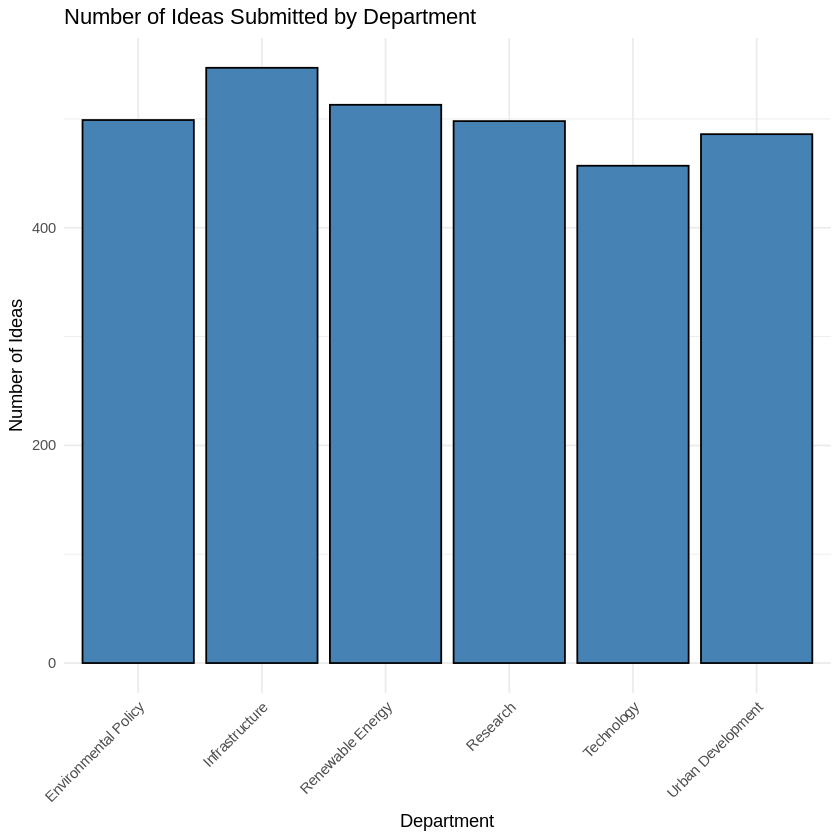


Plot 3: Box Plot of Number of Votes by Approval Status


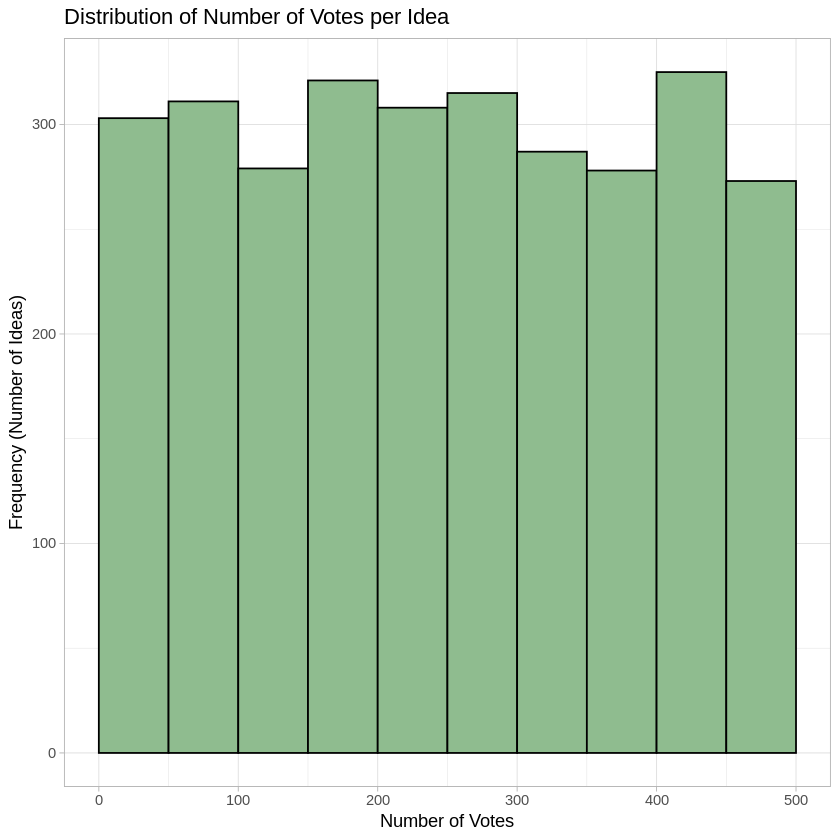



--- End of Section 1 R Code ---


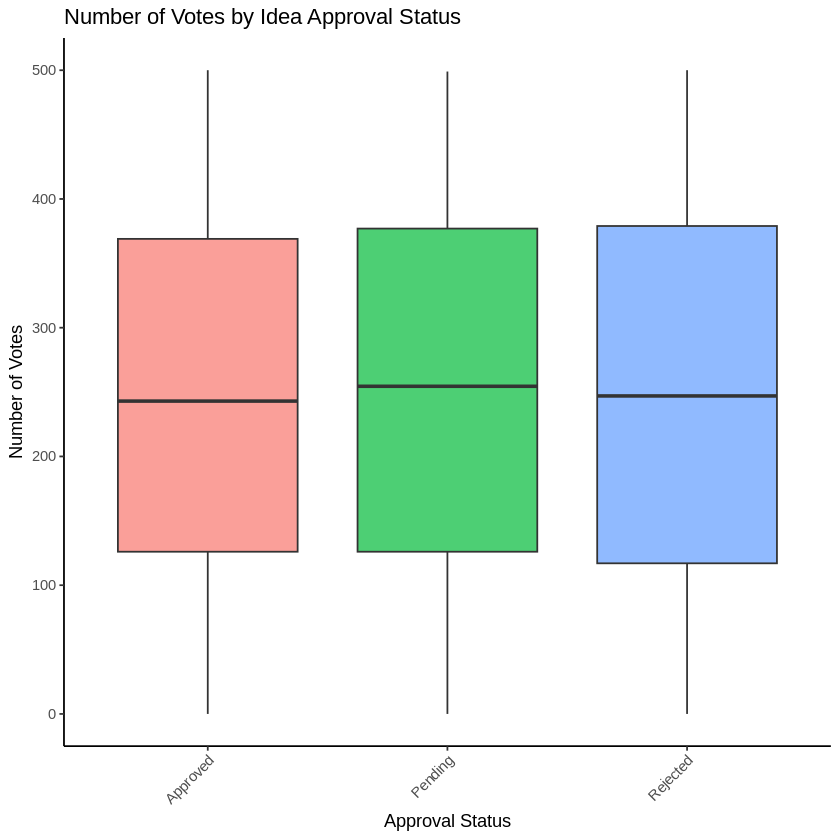

In [ ]:
# --- Previous code from Section 1 (assuming it ran successfully up to this point) ---
# Install necessary packages (if not already installed in your Colab session)
# In Colab, you typically need to install packages for each session.
install.packages("dplyr", quiet = TRUE)
install.packages("ggplot2", quiet = TRUE)
install.packages("sqldf", quiet = TRUE)
install.packages("lubridate", quiet = TRUE)
install.packages("knitr", quiet = TRUE)

# Load the libraries
library(dplyr)
library(ggplot2)
library(sqldf)
library(lubridate)
library(knitr) # For kable for nicer table printing

# Convert 'Idea.Submission.Date' to Date objects
# This step is crucial and should have been done earlier.
# If it was already done and resulted in NAs for some rows, those NAs might cause issues.
greenfuture_df$Idea.Submission.Date <- dmy(greenfuture_df$Idea.Submission.Date, quiet = TRUE) # quiet=TRUE suppresses parsing failure messages

# Check for NAs introduced by dmy (if any dates were unparseable)
cat("Number of NAs in Idea.Submission.Date after dmy conversion: ", sum(is.na(greenfuture_df$Idea.Submission.Date)), "\n")

# --- Executing SQL Queries in R for Innovation Analysis (sqldf) (4 Marks) ---
cat("\n\n--- SQLDF: EXECUTING SQL QUERIES ---\n")

# Query 1: Select all ideas from 'Germany' with more than 200 votes.
cat("\nQuery 1 (sqldf): Ideas from Germany with > 200 votes\n")
query1_result_sqldf <- sqldf("SELECT `Idea.Title`, Department, `Number.of.Votes`
                               FROM greenfuture_df
                               WHERE `Office.Location` = 'Germany' AND `Number.of.Votes` > 200
                               ORDER BY `Number.of.Votes` DESC
                               LIMIT 5")
print(kable(query1_result_sqldf))

# Query 2: Count number of ideas and average votes per 'Idea.Category'.
cat("\nQuery 2 (sqldf): Count and average votes per Idea.Category\n")
query2_result_sqldf <- sqldf("SELECT `Idea.Category`,
                                      COUNT(*) AS NumberOfIdeas,
                                      AVG(`Number.of.Votes`) AS AverageVotes
                               FROM greenfuture_df
                               GROUP BY `Idea.Category`
                               ORDER BY AverageVotes DESC")
print(kable(query2_result_sqldf))

# Query 3: Find ideas submitted in 2024 that are 'Approved'.
# CORRECTED APPROACH for date handling with sqldf:
# Create a temporary data frame for this query to avoid altering the original greenfuture_df structure unnecessarily.
greenfuture_df_for_query3 <- greenfuture_df

# Ensure the date column is truly of Date class and handle NAs before formatting
# If Idea.Submission.Date is already Date class, this is fine.
# We will filter out rows with NA dates before formatting for sqldf to be safe.
greenfuture_df_for_query3_no_na_dates <- greenfuture_df_for_query3 %>%
  filter(!is.na(Idea.Submission.Date))

# Now format the non-NA dates to text 'YYYY-MM-DD'
greenfuture_df_for_query3_no_na_dates$Idea.Submission.Date.Text <- format(greenfuture_df_for_query3_no_na_dates$Idea.Submission.Date, "%Y-%m-%d")

cat("\nQuery 3 (sqldf): Approved ideas submitted in 2024\n")
# Ensure the dataframe passed to sqldf has the text date column
query3_result_sqldf <- sqldf("SELECT `Idea.Title`, Department, `Idea.Submission.Date.Text`
                               FROM greenfuture_df_for_query3_no_na_dates
                               WHERE `Approval.Status` = 'Approved' AND strftime('%Y', `Idea.Submission.Date.Text`) = '2024'
                               LIMIT 5")
print(kable(query3_result_sqldf))

# Query 4: Top 5 office locations by total number of ideas submitted.
cat("\nQuery 4 (sqldf): Top 5 office locations by total ideas\n")
query4_result_sqldf <- sqldf("SELECT `Office.Location`, COUNT(*) as TotalIdeas
                               FROM greenfuture_df
                               GROUP BY `Office.Location`
                               ORDER BY TotalIdeas DESC
                               LIMIT 5")
print(kable(query4_result_sqldf))


# --- Data Manipulation and Transformation in R (dplyr) (3 Marks) ---
cat("\n\n--- DPLYR: DATA MANIPULATION AND TRANSFORMATION ---\n")

# Example 1: Create new columns 'SubmissionYear' and 'IsHighImpact'
greenfuture_transformed_df <- greenfuture_df %>%
  filter(!is.na(Idea.Submission.Date)) %>% # Ensure no NA dates before year()
  mutate(
    SubmissionYear = year(Idea.Submission.Date),
    IsHighImpact = ifelse(Number.of.Votes > 300 & Approval.Status == "Approved", "Yes", "No")
  )
cat("\nTransformed data with 'SubmissionYear' and 'IsHighImpact' - first 5 rows:\n")
print(head(greenfuture_transformed_df %>%
             select(Idea.Title, Idea.Submission.Date, SubmissionYear, Number.of.Votes, IsHighImpact), 5))

# Example 2: Filter for ideas that are 'Approved' AND 'Completed'
approved_completed_ideas <- greenfuture_transformed_df %>%
  filter(Approval.Status == "Approved" & Implementation.Status == "Completed")
cat("\nNumber of Approved AND Completed ideas:", nrow(approved_completed_ideas), "\n")
cat("Details of first 5 Approved AND Completed ideas:\n")
if (nrow(approved_completed_ideas) > 0) {
  print(head(approved_completed_ideas %>% select(Idea.Title, Department, Number.of.Votes), 5))
} else {
  cat("No ideas found that are both Approved and Completed.\n")
}


# Example 3: Arrange data by 'Office.Location' and then by 'Number.of.Votes' descending
arranged_df <- greenfuture_transformed_df %>%
  arrange(Office.Location, desc(Number.of.Votes))
cat("\nData arranged by Office.Location, then by descending Number.of.Votes - first 10 rows:\n")
print(head(arranged_df %>% select(Office.Location, Idea.Title, Number.of.Votes), 10))

# Example 4: Summarise data to find min, max, and median votes for each 'Collaboration.Status'
collaboration_summary <- greenfuture_transformed_df %>%
  group_by(Collaboration.Status) %>%
  summarise(
    MinVotes = min(Number.of.Votes, na.rm = TRUE),
    MedianVotes = median(Number.of.Votes, na.rm = TRUE),
    MaxVotes = max(Number.of.Votes, na.rm = TRUE),
    Count = n(),
    .groups = 'drop' # Good practice to add .groups argument
  )
cat("\nSummary of votes by Collaboration.Status:\n")
print(kable(collaboration_summary))


# --- Data Visualisation in R (ggplot2) (3 Marks) ---
cat("\n\n--- GGPLOT2: DATA VISUALISATION ---\n")

# Plot 1: Bar Chart of Idea Counts by Department
cat("\nPlot 1: Bar Chart of Idea Counts by Department\n")
plot1 <- ggplot(greenfuture_df, aes(x = Department)) +
  geom_bar(fill = "steelblue", color = "black") +
  theme_minimal(base_size = 11) +
  labs(title = "Number of Ideas Submitted by Department",
       x = "Department",
       y = "Number of Ideas") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
print(plot1)

# Plot 2: Histogram of Number of Votes
cat("\nPlot 2: Histogram of Number of Votes\n")
plot2 <- ggplot(greenfuture_df, aes(x = Number.of.Votes)) +
  geom_histogram(binwidth = 50, fill = "darkseagreen", color = "black", boundary=0) +
  theme_light(base_size = 11) +
  labs(title = "Distribution of Number of Votes per Idea",
       x = "Number of Votes",
       y = "Frequency (Number of Ideas)")
print(plot2)

# Plot 3: Box Plot of Number of Votes by Approval Status
cat("\nPlot 3: Box Plot of Number of Votes by Approval Status\n")
plot3 <- ggplot(greenfuture_df, aes(x = Approval.Status, y = Number.of.Votes, fill = Approval.Status)) +
  geom_boxplot(alpha = 0.7, na.rm = TRUE) +
  theme_classic(base_size = 11) +
  labs(title = "Number of Votes by Idea Approval Status",
       x = "Approval Status",
       y = "Number of Votes") +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1))
print(plot3)

cat("\n\n--- End of Section 1 R Code ---\n")